In [21]:
import numpy as np 
from sklearn.datasets import make_classification 
from pandas import DataFrame
import pandas as pd

In [22]:
############################## small data
#使用make_classification构造1000个样本，每个样本有20个feature 
X, y = make_classification(1000, n_features=20, n_informative=2, n_redundant=2, n_classes=2, random_state=0) 
#存为dataframe格式 
#print (X.head())

In [23]:
df = pd.DataFrame(np.hstack((X, y[:, None])),columns = list(range(20)) + ["class"])

print (df[:6])

          0         1         2         3         4         5         6  \
0 -1.063780  0.676409  1.069356 -0.217580  0.460215 -0.399167 -0.079188   
1  0.070848 -1.695281  2.449449 -0.530494 -0.932962  2.865204  2.435729   
2  0.940284 -0.492146  0.677956 -0.227754  1.401753  1.231653 -0.777464   
3 -0.299517  0.759890  0.182803 -1.550233  0.338218  0.363241 -2.100525   
4 -2.630627  0.231034  0.042463  0.478851  1.546742  1.637956 -1.532072   
5 -0.262645  0.327590  0.997845 -1.577903 -0.828981 -0.202735  0.825932   

          7         8         9  ...          11        12        13  \
0  1.209385 -0.785315 -0.172186  ...   -0.993119  0.306935  0.064058   
1 -1.618500  1.300717  0.348402  ...    0.225324  0.605563 -0.192101   
2  0.015616  1.331713  1.084773  ...   -0.050120  0.948386 -0.173428   
3 -0.438068 -0.166393 -0.340835  ...    1.178724  2.831480  0.142414   
4 -0.734445  0.465855  0.473836  ...   -1.061194 -0.888880  1.238409   
5 -0.489252  0.849912 -0.035563  ...    0.

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

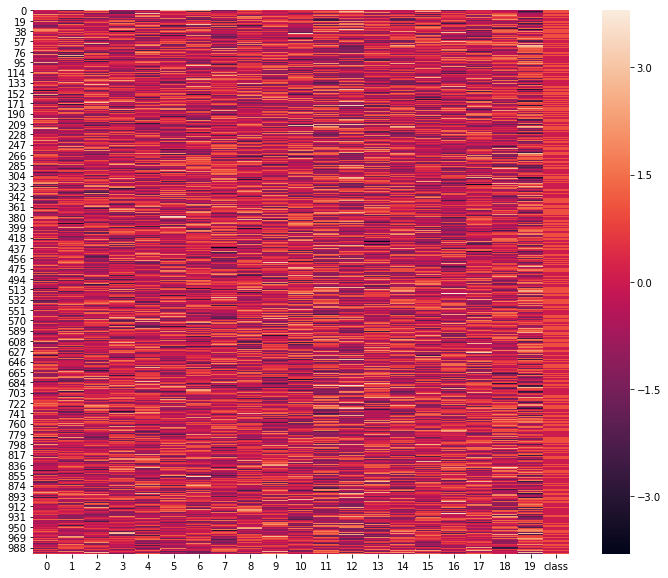

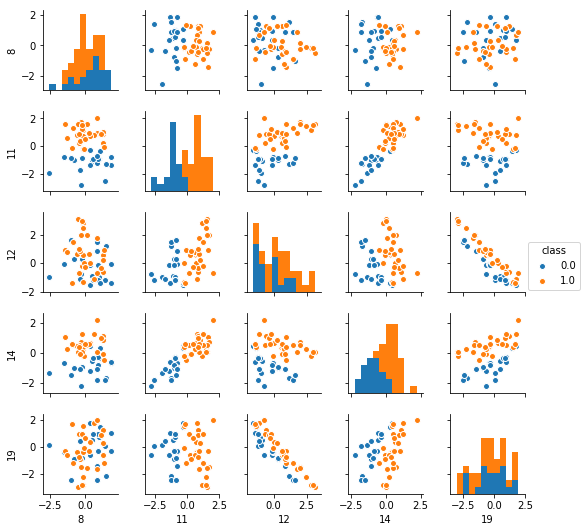

In [29]:
#使用pairplot去看不同特征维度pair下数据的空间分布状况 
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", size=1.5) 
plt.show()

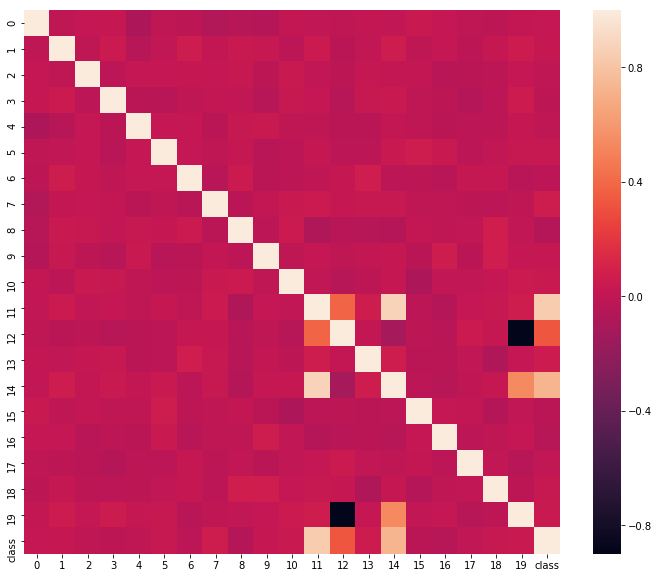

In [30]:
plt.figure(figsize=(12, 10)) 
#计算各维度特征之间(以及最后的类别)的相关性。
_ = sns.heatmap(df.corr(), annot=False) #_ = sns.corrplot(df, annot=False) 
plt.show()


In [33]:

# 拟合情况判断  overfitting underfitting

from sklearn.svm import LinearSVC 
from sklearn.learning_curve import learning_curve 

# 用学习曲线 learning curve 来判别过拟合问题  http://blog.csdn.net/aliceyangxi1987/article/details/73598857
#绘制学习曲线，以确定模型的状况 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)): 
	""" 画出data在某模型上的learning curve. 参数解释 ---------- 
	estimator : 你用的分类器。 
	title : 表格的标题。 
	X : 输入的feature，numpy类型 y : 输入的target vector 
	ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点 
	cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份) 
	""" 
	plt.figure() 
	train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes) 
	train_scores_mean = np.mean(train_scores, axis=1) 
	train_scores_std = np.std(train_scores, axis=1) 
	test_scores_mean = np.mean(test_scores, axis=1) 
	test_scores_std = np.std(test_scores, axis=1) 
	# fill_between 填充两个函数color黄色填充  
	plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
	plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
	plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
	plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
	plt.xlabel("Training examples") 
	plt.ylabel("Score") 
	plt.legend(loc="best") 
	plt.grid("on") 
	if ylim: 
		plt.ylim(ylim) 
	plt.title(title) 
	plt.show() 

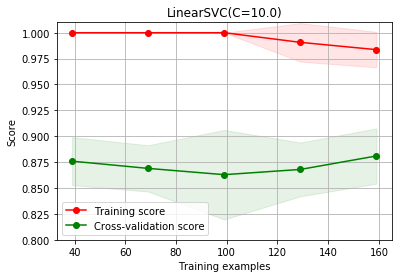

In [35]:
#少样本的情况情况下绘出学习曲线 
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)", X, y, ylim=(0.8, 1.01), train_sizes=np.linspace(.05, 0.2, 5))



### 怎样判断过拟合了， Training score 下降，Cross-validation score 上升


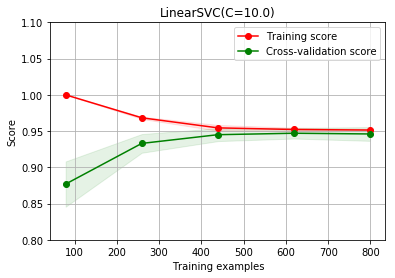

In [36]:
# overfitting
#一、增大一些样本量 
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)", X, y, ylim=(0.8, 1.1), train_sizes=np.linspace(.1, 1.0, 5))


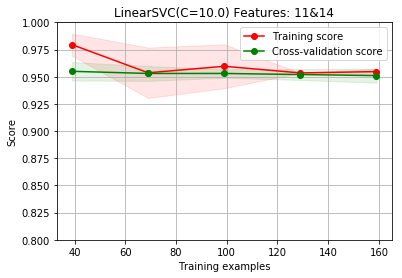

In [37]:
#二、减少特征的量(只用我们觉得有效的特征)
# 1.通过pairplot 上面的图形判断出来的
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0) Features: 11&14", X[:, [11, 14]], y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))


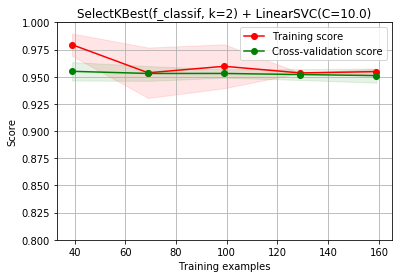

In [38]:
# 2.自动进行特征组合和选择(前提是特征维度不高，否则，遍历所有的组合是非常耗时的过程) 时间问题
from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectKBest, f_classif 
# SelectKBest(f_classif, k=2) 会根据Anova F-value选出 最好的k=2个特征 
plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=2)), 
	# select two features 
	("svc", LinearSVC(C=10.0))]), 
	"SelectKBest(f_classif, k=2) + LinearSVC(C=10.0)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))


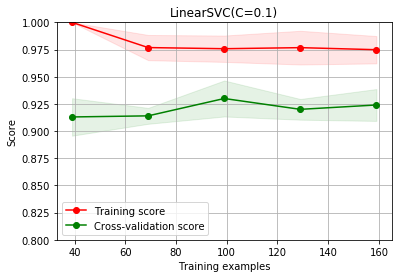

In [46]:
#三、过拟合后，优先使用正则化  增强正则化作用(比如说这里是减小LinearSVC中的C参数) 
# 1.手动设置C的值
plot_learning_curve(LinearSVC(C=0.1), "LinearSVC(C=0.1)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


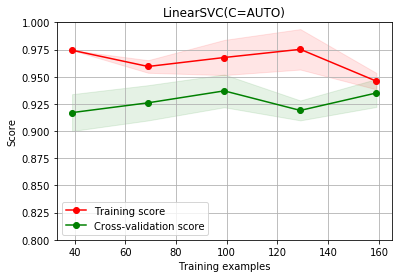

In [41]:
# 2.GridSearchCV自动判断C的值  时间问题 试一下 C:0.01
from sklearn.grid_search import GridSearchCV 
estm = GridSearchCV(LinearSVC(), param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]}) 
plot_learning_curve(estm, "LinearSVC(C=AUTO)", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5)) 



In [43]:
print ("Chosen parameter on 100 datapoints: %s" % estm.fit(X[:500], y[:500]).best_params_)

Chosen parameter on 100 datapoints: {'C': 0.001}


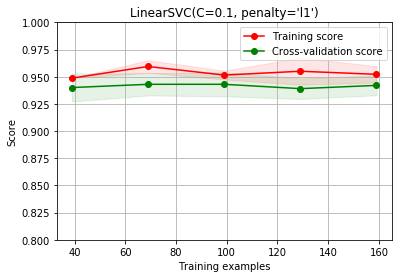

In [44]:
# 	3.L2正则化，它对于最后的特征权重的影响是，尽量打散权重到每个特征维度上，不让权重集中在某些维度上，出现权重特别高的特征。
#   而L1正则化，它对于最后的特征权重的影响是，让特征获得的权重稀疏化，也就是对结果影响不那么大的特征，干脆就拿不着权重。
#   此时，如果要调参数就需要了解LinearSVC的原理，才能知道各个参数的意思
plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False), "LinearSVC(C=0.1, penalty='l1')", X, y, ylim=(0.8, 1.0), train_sizes=np.linspace(.05, 0.2, 5))


In [50]:
# 最后特征获得的权重  此过程相当于前面的选特征
estm = LinearSVC(C=0.1, penalty='l1', dual=False) 
estm.fit(X[:450], y[:450]) 
# 用450个点来训练 
print ("Coefficients learned: %s" % estm.coef_)
print ("Non-zero coefficients: %s" % np.nonzero(estm.coef_)[1])


Coefficients learned: [[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -3.22368954e-02
   -1.66068215e-02   4.41330088e-03  -4.32445932e-02   3.85074650e-02
    0.00000000e+00   0.00000000e+00   6.27297144e-02   1.22238631e+00
    1.18926592e-01  -9.42728985e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   9.27611613e-02   0.00000000e+00]]
Non-zero coefficients: [ 3  4  5  6  7 10 11 12 13 18]


#### underfitting

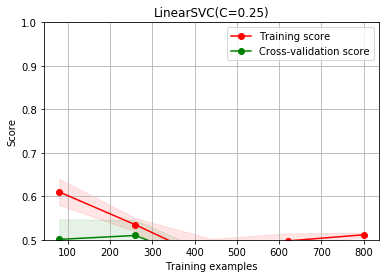

In [52]:
# underfitting
# 得分都不太高，所以我们猜测一下，这个时候我们的数据，处于欠拟合状态。
#构造一份环形数据
from sklearn.datasets import make_circles 
X, y = make_circles(n_samples=1000, random_state=2) 
#绘出学习曲线 
plot_learning_curve(LinearSVC(C=0.25),"LinearSVC(C=0.25)",X, y, ylim=(0.5, 1.0),train_sizes=np.linspace(.1, 1.0, 5))


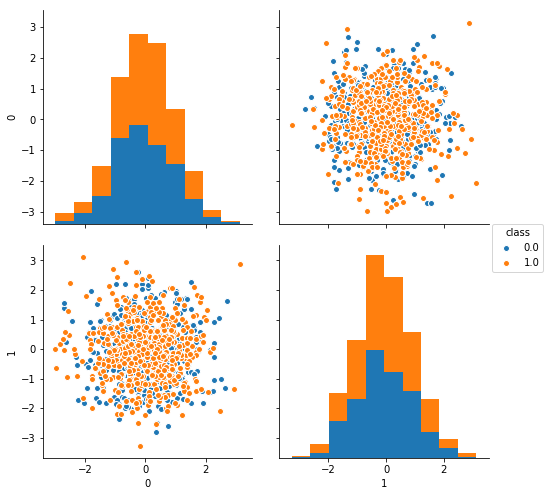

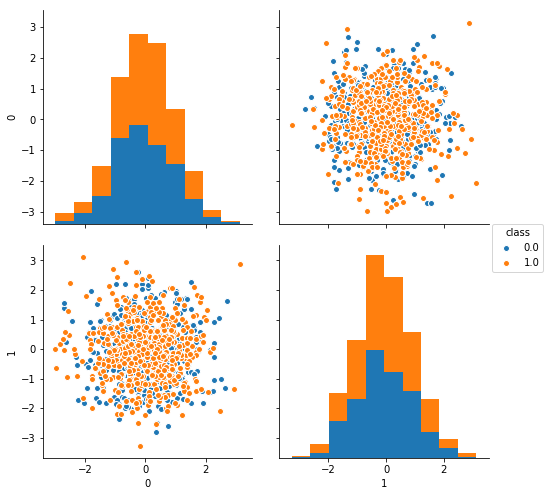

In [55]:
# 看一下数据
f = DataFrame(np.hstack((X, y[:, None])), columns = list(range(2)) + ["class"]) 
_ = sns.pairplot(df, vars=[0, 1], hue="class", size=3.5)
plt.show()

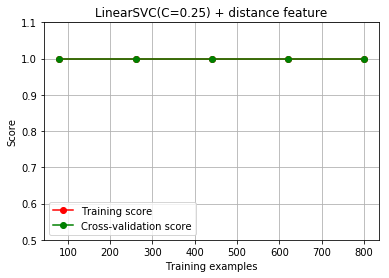

In [57]:
# 异或问题 线性不可分
# 加入原始特征的平方项作为新特征 
X_extra = np.hstack((X, X[:, [0]]**2 + X[:, [1]]**2)) 
plot_learning_curve(LinearSVC(C=0.25), "LinearSVC(C=0.25) + distance feature", X_extra, y, ylim=(0.5, 1.1), train_sizes=np.linspace(.1, 1.0, 5))


#### big data

In [59]:

#生成大样本，高纬度特征数据 
X, y = make_classification(200000, n_features=200, n_informative=25, n_redundant=0, n_classes=10, class_sep=2, random_state=0) 

#用SGDClassifier做训练，并画出batch在训练前后的得分差 
from sklearn.linear_model import SGDClassifier 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


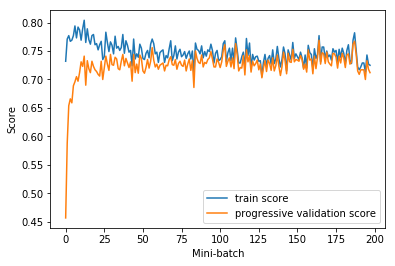

In [64]:
est = SGDClassifier(penalty="l2", alpha=0.001) 
progressive_validation_score = [] 
train_score = [] 
for datapoint in range(0, 199000, 1000): 
	X_batch = X[datapoint:datapoint+1000] 
	y_batch = y[datapoint:datapoint+1000] 
	if datapoint > 0: progressive_validation_score.append(est.score(X_batch, y_batch)) 
	est.partial_fit(X_batch, y_batch, classes=range(10)) 
	if datapoint > 0: train_score.append(est.score(X_batch, y_batch)) 
plt.plot(train_score, label="train score") 
plt.plot(progressive_validation_score, label="progressive validation score") 
plt.xlabel("Mini-batch") 
plt.ylabel("Score") 
plt.legend(loc='best') 
plt.show() 


Dataset consist of 1083 samples with 64 features each


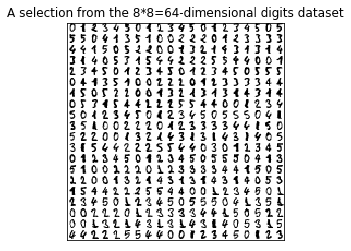

In [66]:

# big data visual

#直接从sklearn中load数据集 
from sklearn.datasets import load_digits 
digits = load_digits(n_class=6) 
X = digits.data 
y = digits.target 
n_samples, n_features = X.shape 
print ("Dataset consist of %d samples with %d features each" % (n_samples, n_features) )
# 绘制数字示意图 
n_img_per_row = 20 
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row)) 
for i in range(n_img_per_row): 
	ix = 10 * i + 1 
	for j in range(n_img_per_row): 
		iy = 10 * j + 1 
		img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8)) 
plt.imshow(img, cmap=plt.cm.binary) 
plt.xticks([]) 
plt.yticks([]) 
_ = plt.title('A selection from the 8*8=64-dimensional digits dataset') 
plt.show()



In [67]:

#定义绘图函数 

from matplotlib import offsetbox 
def plot_embedding(X, title=None): 
	x_min, x_max = np.min(X, 0), np.max(X, 0) 
	X = (X - x_min) / (x_max - x_min) 
	plt.figure(figsize=(10, 10)) 
	ax = plt.subplot(111) 
	for i in range(X.shape[0]): 
		plt.text(X[i, 0], X[i, 1], str(digits.target[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12}) 
		if hasattr(offsetbox, 'AnnotationBbox'): 
			# only print thumbnails with matplotlib > 1.0 
			shown_images = np.array([[1., 1.]]) 
			# just something big 
			for i in range(digits.data.shape[0]): 
				dist = np.sum((X[i] - shown_images) ** 2, 1) 
				if np.min(dist) < 4e-3: 
				# don't show points that are too close continue 
					shown_images = np.r_[shown_images, [X[i]]] 
					imagebox = offsetbox.AnnotationBbox( offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]) 
					ax.add_artist(imagebox) 
					plt.xticks([]), plt.yticks([]) 
	if title is not None: 
		plt.title(title) 
	plt.show()


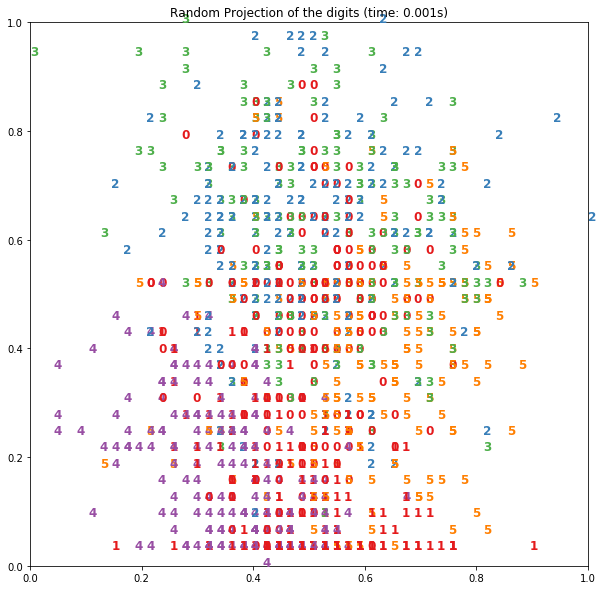

In [70]:

# 随机投射
#import所需的package
import time
from sklearn import (manifold, decomposition, random_projection) 
#记录开始时间 
start_time = time.time() 
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42) 
X_projected = rp.fit_transform(X) 
plot_embedding(X_projected, "Random Projection of the digits (time: %.3fs)" % (time.time() - start_time))


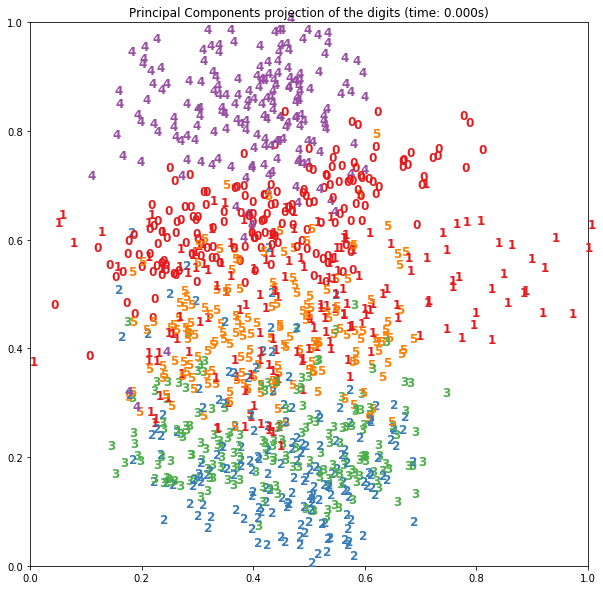

In [71]:
# PCA(Principal Component Analysis，主成分分析)降维之后再画图
#TruncatedSVD 是 PCA的一种实现 
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X) 
#记录时间
start_time = time.time()
plot_embedding(X_pca,"Principal Components projection of the digits (time: %.3fs)" % (time.time() - start_time))


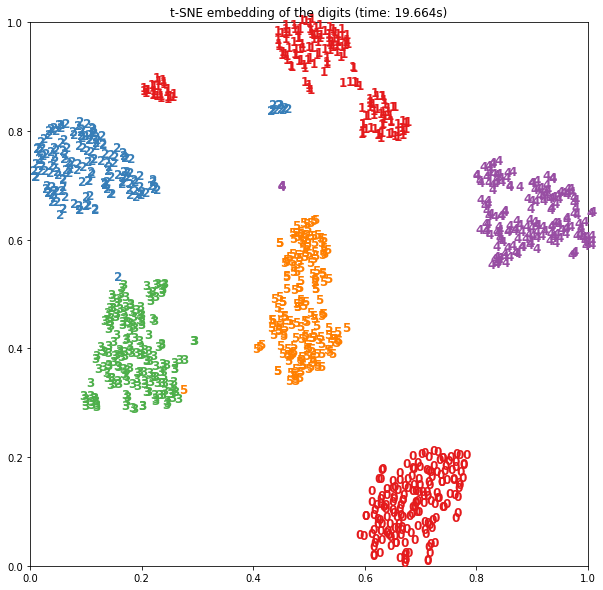

In [72]:
#如果我们用一些非线性的变换来做降维操作，从原始的64维降到2维空间，效果更好，
#比如这里我们用到一个技术叫做t-SNE，sklearn的manifold对其进行了实现：
#它需要更多的计算时间。也不太适合在大数据集上全集使用
#降维 
start_time = time.time() 
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0) 
X_tsne = tsne.fit_transform(X) 
#绘图 
plot_embedding(X_tsne, "t-SNE embedding of the digits (time: %.3fs)" % (time.time() - start_time))


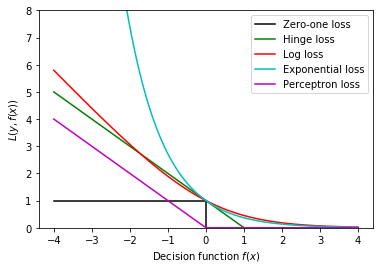

In [75]:

# loss function

# 改自http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html 
xmin, xmax = -4, 4 
xx = np.linspace(xmin, xmax, 100) 
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-', label="Zero-one loss") 
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-', label="Hinge loss") 
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-', label="Log loss") 
plt.plot(xx, np.exp(-xx), 'c-', label="Exponential loss") 
plt.plot(xx, -np.minimum(xx, 0), 'm-', label="Perceptron loss") 
plt.ylim((0, 8)) 
plt.legend(loc="upper right") 
plt.xlabel(r"Decision function $f(x)$") 
plt.ylabel("$L(y, f(x))$") 
plt.show()
